# Taller 1 - Agua
__Hans D. Escobar H.__


Fisiología Vegetal 2024-01, Profesor Hernan M. Romero

- Describa el comportamiento de cada cultivar al déficit hídrico.
- Analice si hay diferencias en tolerancia de los cultivares al déficit.
- Elabore una hipótesis sobre el tipo de mecanismo de tolerancia de las plantas.


In [225]:
# Hans D. Escobar H.

# Environment set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns

sns.set_context("poster")
sns.set_style("whitegrid")

## Data exploration

In [226]:
raw_df = pd.read_csv("../Private_Data/e_guineensis.csv")
raw_df.head(n=3)

,Cultivar,WATERPOT,PROLINE,TOTSUG,REDSUG,ABA,PH4AM,PH9AM,PHOTO,TRANS,WUE
0,IRHO_1001,-0.05MPa,0.166059,43.392402,2.507559,1.765338,-0.29,-1.898571,10.865284,1.585046,6.854869
1,IRHO_1001,-0.05MPa,0.176059,66.962402,3.157559,2.285338,-0.25,-1.708571,11.665284,2.195046,5.314368
2,IRHO_1001,-0.05MPa,0.186059,90.532402,3.807559,2.805338,-0.21,-1.518571,12.465284,2.805046,4.443878


In [227]:
grouped_raw_df = raw_df.groupby(["Cultivar", "WATERPOT"]).agg(["mean", "std"])
for var_name in x.columns.levels[0]:
    grouped_raw_df.loc[:, (var_name, "formatted")] = x[var_name].apply(
        lambda x: "{:.2f} ± {:.2f}".format(x["mean"], x["std"]), axis=1
    )
group_print_summary = grouped_raw_df.xs("formatted", level=1, axis=1)
group_print_summary

PROLINE          TOTSUG        REDSUG            ABA  \
Cultivar  WATERPOT                                                             
IRHO_1001 -0.05MPa  0.18 ± 0.01   66.96 ± 23.57   3.16 ± 0.65    2.29 ± 0.52   
          -0.5MPa   0.16 ± 0.03  157.90 ± 26.03   3.32 ± 0.55    6.13 ± 2.98   
          -1MPa     0.16 ± 0.03  209.04 ± 28.00   4.41 ± 1.77   26.78 ± 9.52   
          -2MPa     0.17 ± 0.01   133.60 ± 6.30   3.55 ± 1.48  61.42 ± 14.96   
IRHO_7001 -0.05MPa  0.18 ± 0.03   55.30 ± 20.59   3.18 ± 0.50    1.88 ± 1.12   
          -0.5MPa   0.19 ± 0.01  107.08 ± 27.94   3.64 ± 0.68   10.46 ± 3.64   
          -1MPa     0.20 ± 0.01  260.03 ± 14.34   3.24 ± 0.46   43.88 ± 3.34   
          -2MPa     0.20 ± 0.01  369.50 ± 39.02   3.03 ± 0.74   74.84 ± 9.09   
U_1076    -0.05MPa  0.23 ± 0.06    71.94 ± 3.30   6.93 ± 1.96    0.14 ± 0.02   
          -0.5MPa   0.39 ± 0.05   105.65 ± 5.59  13.89 ± 3.54    0.53 ± 0.08   
          -1MPa     0.55 ± 0.10   193.32 ± 7.82  20.07 ± 3.86   10.01 ± 6.99   
          -2MPa     0.72 ± 0.19  288.52 ± 13.14  28.34 ± 4.47   41.18 ± 3.01   
U_1080    -0.05MPa  0.23 ± 0.04    50.56 ± 3.72  12.90 ± 2.98    0.15 ± 0.01   
          -0.5MPa   0.36 ± 0.03    76.02 ± 4.11  18.48 ± 5.75    0.50 ± 0.08   
          -1MPa     0.49 ± 0.01   155.35 ± 7.05  28.32 ± 3.18    5.46 ± 0.67   
          -2MPa     0.83 ± 0.04  225.88 ± 10.05  33.37 ± 3.62   24.34 ± 5.43   

                           PH4AM         PH9AM         PHOTO        TRANS  \
Cultivar  WATERPOT                                                          
IRHO_1001 -0.05MPa  -0.25 ± 0.04  -1.71 ± 0.19  11.67 ± 0.80  2.20 ± 0.61   
          -0.5MPa   -0.52 ± 0.03  -1.68 ± 0.14   7.14 ± 0.99  1.31 ± 0.36   
          -1MPa     -0.37 ± 0.03  -1.96 ± 0.29   3.46 ± 1.32  0.92 ± 0.39   
          -2MPa     -1.07 ± 0.06  -1.53 ± 0.17   1.48 ± 0.41  0.56 ± 0.20   
IRHO_7001 -0.05MPa  -0.23 ± 0.03  -1.77 ± 0.18  10.98 ± 0.90  2.31 ± 0.58   
          -0.5MPa   -0.47 ± 0.03  -1.71 ± 0.19   8.93 ± 1.13  1.42 ± 0.44   
          -1MPa     -0.42 ± 0.03  -1.81 ± 0.13   6.67 ± 2.42  1.36 ± 0.51   
          -2MPa     -0.43 ± 0.03  -1.65 ± 0.27   3.50 ± 1.01  0.86 ± 0.09   
U_1076    -0.05MPa  -0.10 ± 0.01  -1.50 ± 0.01  11.82 ± 1.30  2.76 ± 0.14   
          -0.5MPa   -0.07 ± 0.04  -1.45 ± 0.08   7.74 ± 1.08  1.82 ± 0.35   
          -1MPa     -1.05 ± 0.22  -2.10 ± 0.01   3.10 ± 0.80  0.94 ± 0.17   
          -2MPa     -2.40 ± 0.08  -2.30 ± 0.15   2.54 ± 0.12  0.77 ± 0.10   
U_1080    -0.05MPa  -0.05 ± 0.01  -1.45 ± 0.08  12.99 ± 0.50  3.01 ± 0.22   
          -0.5MPa   -0.10 ± 0.01  -1.50 ± 0.01   7.77 ± 0.71  1.77 ± 0.11   
          -1MPa     -0.65 ± 0.08  -2.10 ± 0.01   2.48 ± 0.21  0.70 ± 0.05   
          -2MPa     -2.50 ± 0.08  -1.95 ± 0.01   2.35 ± 1.18  0.85 ± 0.46   

                            WUE  
Cultivar  WATERPOT               
IRHO_1001 -0.05MPa  5.54 ± 1.22  
          -0.5MPa   5.61 ± 0.82  
          -1MPa     3.83 ± 0.21  
          -2MPa     2.72 ± 0.24  
IRHO_7001 -0.05MPa  4.89 ± 0.86  
          -0.5MPa   6.53 ± 1.28  
          -1MPa     4.91 ± 0.07  
          -2MPa     4.03 ± 0.74  
U_1076    -0.05MPa  4.27 ± 0.25  
          -0.5MPa   4.28 ± 0.23  
          -1MPa     3.27 ± 0.26  
          -2MPa     3.33 ± 0.28  
U_1080    -0.05MPa  4.33 ± 0.15  
          -0.5MPa   4.38 ± 0.13  
          -1MPa     3.57 ± 0.05  
          -2MPa     2.84 ± 0.17

Para aplicar los siguientes métodos primero debería evaluarse Normalidad, homocedasticidad e independencia entre los grupos. Este paso se omitirá para el ejercicio.

In [228]:
def twoway_anova(dataframe):
    variables_to_check = [
        "PROLINE",
        "TOTSUG",
        "REDSUG",
        "ABA",
        "PH4AM",
        "PH9AM",
        "PHOTO",
        "TRANS",
        "WUE",
    ]
    for variable_name in variables_to_check:
        print("Variable {}:".format(variable_name))
        model = ols(
            "{} ~ C(Cultivar) + C(WATERPOT) + C(Cultivar):C(WATERPOT)".format(
                variable_name
            ),
            data=dataframe,
        ).fit()
        result = sm.stats.anova_lm(model, type=2)
        display(result)

In [229]:
twoway_anova(raw_df)

Variable PROLINE:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,1.077082,0.359027,96.383218,4.151276e-16
C(WATERPOT),3.0,0.509263,0.169754,45.571651,1.174143e-11
C(Cultivar):C(WATERPOT),9.0,0.491521,0.054613,14.661318,4.846020e-09
Residual,32.0,0.119200,0.003725,NaN,NaN


Variable TOTSUG:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,34428.934953,11476.311651,33.710672,5.042640e-10
C(WATERPOT),3.0,275561.519526,91853.839842,269.812700,8.681932e-23
C(Cultivar):C(WATERPOT),9.0,83249.481443,9249.942383,27.170905,1.533826e-12
Residual,32.0,10893.938198,340.435569,NaN,NaN


Variable REDSUG:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,3619.175676,1206.391892,155.747247,3.634124e-19
C(WATERPOT),3.0,769.950509,256.650170,33.133974,6.204582e-10
C(Cultivar):C(WATERPOT),9.0,753.349265,83.705474,10.806519,1.750136e-07
Residual,32.0,247.866600,7.745831,NaN,NaN


Variable ABA:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,4578.544148,1526.181383,46.983117,7.918224e-12
C(WATERPOT),3.0,18329.016702,6109.672234,188.084753,2.131703e-20
C(Cultivar):C(WATERPOT),9.0,2845.058214,316.117579,9.731602,5.571249e-07
Residual,32.0,1039.475600,32.483613,NaN,NaN


Variable PH4AM:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,2.088164,0.696055,139.037141,1.968550e-18
C(WATERPOT),3.0,15.285664,5.095221,1017.772056,8.240648e-32
C(Cultivar):C(WATERPOT),9.0,8.654701,0.961633,192.086570,2.961629e-25
Residual,32.0,0.160200,0.005006,NaN,NaN


Variable PH9AM:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,0.098475,0.032825,1.447630,2.472973e-01
C(WATERPOT),3.0,1.417434,0.472478,20.836960,1.137146e-07
C(Cultivar):C(WATERPOT),9.0,1.508420,0.167602,7.391498,9.530977e-06
Residual,32.0,0.725600,0.022675,NaN,NaN


Variable PHOTO:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,16.808435,5.602812,4.926794,6.326079e-03
C(WATERPOT),3.0,643.120130,214.373377,188.507756,2.060526e-20
C(Cultivar):C(WATERPOT),9.0,32.232073,3.581341,3.149228,7.851087e-03
Residual,32.0,36.390800,1.137212,NaN,NaN


Variable TRANS:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,0.889873,0.296624,2.437448,8.262682e-02
C(WATERPOT),3.0,23.654230,7.884743,64.791252,1.093108e-13
C(Cultivar):C(WATERPOT),9.0,1.874594,0.208288,1.711566,1.270265e-01
Residual,32.0,3.894226,0.121695,NaN,NaN


Variable WUE:


,df,sum_sq,mean_sq,F,PR(>F)
C(Cultivar),3.0,14.010437,4.670146,13.492534,7.360523e-06
C(WATERPOT),3.0,27.904227,9.301409,26.872734,7.137536e-09
C(Cultivar):C(WATERPOT),9.0,7.284204,0.809356,2.338313,3.729952e-02
Residual,32.0,11.076100,0.346128,NaN,NaN


- Para todas las variables,salvo PH9AM y TRANS, Cultivar y WATERPOT tienen un efecto sobre ellas, y hay interacción entre estas dos variables independientes.

- Para PH9AM el Cultivar no tiene efecto, pero sí ha interacción con WATERPOT.

- Para TRANS el Cultivar no tiene efecto, tampoco hay interacción con WATERPOT.

In [230]:
def oneway_anova_tukey(filtered_df):
    variables_to_check = [
        "PROLINE",
        "TOTSUG",
        "REDSUG",
        "ABA",
        "PH4AM",
        "PH9AM",
        "PHOTO",
        "TRANS",
        "WUE",
    ]
    for variable_name in variables_to_check:
        print("Variable {}:".format(variable_name))
        model = ols("{} ~ Cultivar".format(variable_name), data=filtered_df).fit()
        anova_result = sm.stats.anova_lm(model, typ=2)
        display(anova_result)

        tukey = pairwise_tukeyhsd(
            endog=filtered_df[variable_name], groups=filtered_df["Cultivar"], alpha=0.05
        )
        display(tukey.summary())

In [231]:
for waterpot_grp in raw_df["WATERPOT"].unique():
    print(
        "\n-----------------------------------------\n\
        WATERPOT: {}\n-----------------------------------------\n".format(
            waterpot_grp
        )
    )
    oneway_anova_tukey(
        raw_df.iloc[raw_df.groupby("WATERPOT").groups[waterpot_grp]][
            ["Cultivar"] + interest_names
        ]
    )


-----------------------------------------
        WATERPOT: -0.05MPa
-----------------------------------------

Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,0.009302,3.0,2.000495,0.192585
Residual,0.012400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0009,1.0,-0.1039,0.102,False
IRHO_1001,U_1076,0.0531,0.4051,-0.0498,0.156,False
IRHO_1001,U_1080,0.0572,0.3489,-0.0458,0.1601,False
IRHO_7001,U_1076,0.0541,0.3914,-0.0489,0.157,False
IRHO_7001,U_1080,0.0581,0.3365,-0.0448,0.161,False
U_1076,U_1080,0.004,0.9992,-0.0989,0.107,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,890.035401,3.0,1.181725,0.375943
Residual,2008.442800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-11.6608,0.8047,-53.0901,29.7686,False
IRHO_1001,U_1076,4.9811,0.9793,-36.4482,46.4105,False
IRHO_1001,U_1080,-16.4047,0.6055,-57.8341,25.0246,False
IRHO_7001,U_1076,16.6419,0.5953,-24.7875,58.0712,False
IRHO_7001,U_1080,-4.744,0.982,-46.1733,36.6854,False
U_1076,U_1080,-21.3859,0.4046,-62.8152,20.0435,False


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,189.894443,3.0,18.902728,0.000546
Residual,26.789000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0209,1.0,-4.7638,4.8057,False
IRHO_1001,U_1076,3.776,0.1294,-1.0087,8.5607,False
IRHO_1001,U_1080,9.7388,0.0008,4.954,14.5235,True
IRHO_7001,U_1076,3.7551,0.132,-1.0296,8.5398,False
IRHO_7001,U_1080,9.7178,0.0008,4.9331,14.5025,True
U_1076,U_1080,5.9627,0.0169,1.178,10.7475,True


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,11.483989,3.0,10.038671,0.004355
Residual,3.050600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.4059,0.8504,-2.0206,1.2087,False
IRHO_1001,U_1076,-2.1432,0.0119,-3.7578,-0.5286,True
IRHO_1001,U_1080,-2.1334,0.0122,-3.7481,-0.5188,True
IRHO_7001,U_1076,-1.7372,0.0356,-3.3519,-0.1226,True
IRHO_7001,U_1080,-1.7275,0.0365,-3.3421,-0.1129,True
U_1076,U_1080,0.0097,1.0,-1.6049,1.6244,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.0875,3.0,43.209876,0.000027
Residual,0.0054,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0167,0.859,-0.0513,0.0846,False
IRHO_1001,U_1076,0.15,0.0005,0.0821,0.2179,True
IRHO_1001,U_1080,0.2,0.0001,0.1321,0.2679,True
IRHO_7001,U_1076,0.1333,0.0011,0.0654,0.2013,True
IRHO_7001,U_1080,0.1833,0.0001,0.1154,0.2513,True
U_1076,U_1080,0.05,0.1638,-0.0179,0.1179,False


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.220352,3.0,3.917361,0.054385
Residual,0.150000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0629,0.9405,-0.4209,0.2952,False
IRHO_1001,U_1076,0.2086,0.3133,-0.1495,0.5666,False
IRHO_1001,U_1080,0.2586,0.174,-0.0995,0.6166,False
IRHO_7001,U_1076,0.2714,0.1486,-0.0866,0.6295,False
IRHO_7001,U_1080,0.3214,0.0794,-0.0366,0.6795,False
U_1076,U_1080,0.05,0.9683,-0.308,0.408,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,6.318207,3.0,2.485037,0.134901
Residual,6.780000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.6881,0.7977,-3.0952,1.719,False
IRHO_1001,U_1076,0.1526,0.9968,-2.2545,2.5597,False
IRHO_1001,U_1080,1.3292,0.353,-1.0779,3.7363,False
IRHO_7001,U_1076,0.8406,0.6893,-1.5664,3.2477,False
IRHO_7001,U_1080,2.0173,0.1039,-0.3898,4.4244,False
U_1076,U_1080,1.1767,0.4469,-1.2304,3.5837,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,1.308042,3.0,2.246048,0.160231
Residual,1.553000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.1178,0.987,-1.0342,1.2698,False
IRHO_1001,U_1076,0.5652,0.444,-0.5868,1.7173,False
IRHO_1001,U_1080,0.8144,0.186,-0.3377,1.9664,False
IRHO_7001,U_1076,0.4474,0.6191,-0.7046,1.5995,False
IRHO_7001,U_1080,0.6966,0.2866,-0.4555,1.8486,False
U_1076,U_1080,0.2491,0.8971,-0.9029,1.4012,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,3.143391,3.0,1.803611,0.224404
Residual,4.647552,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.6487,0.7311,-2.6416,1.3443,False
IRHO_1001,U_1076,-1.2649,0.2531,-3.2579,0.728,False
IRHO_1001,U_1080,-1.2124,0.2822,-3.2054,0.7805,False
IRHO_7001,U_1076,-0.6163,0.759,-2.6092,1.3767,False
IRHO_7001,U_1080,-0.5638,0.8024,-2.5567,1.4291,False
U_1076,U_1080,0.0525,0.9998,-1.9404,2.0454,False



-----------------------------------------
        WATERPOT: -0.5MPa
-----------------------------------------

Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,0.129756,3.0,39.320128,0.000039
Residual,0.008800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0323,0.6468,-0.0544,0.1191,False
IRHO_1001,U_1076,0.2358,0.0001,0.1491,0.3225,True
IRHO_1001,U_1080,0.2081,0.0003,0.1214,0.2948,True
IRHO_7001,U_1076,0.2035,0.0003,0.1168,0.2902,True
IRHO_7001,U_1080,0.1757,0.0009,0.089,0.2625,True
U_1076,U_1080,-0.0277,0.7409,-0.1145,0.059,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,10398.083351,3.0,9.20381,0.005675
Residual,3012.689398,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-50.827,0.0496,-101.5676,-0.0864,True
IRHO_1001,U_1076,-52.2586,0.0437,-102.9992,-1.518,True
IRHO_1001,U_1080,-81.8858,0.0038,-132.6264,-31.1452,True
IRHO_7001,U_1076,-1.4316,0.9997,-52.1722,49.309,False
IRHO_7001,U_1080,-31.0588,0.2779,-81.7994,19.6818,False
U_1076,U_1080,-29.6272,0.3116,-80.3678,21.1134,False


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,515.757466,3.0,14.833724,0.001243
Residual,92.718000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.317,0.9994,-8.5844,9.2185,False
IRHO_1001,U_1076,10.5668,0.0218,1.6653,19.4682,True
IRHO_1001,U_1080,15.1546,0.0027,6.2532,24.056,True
IRHO_7001,U_1076,10.2497,0.0255,1.3483,19.1512,True
IRHO_7001,U_1080,14.8376,0.0031,5.9361,23.739,True
U_1076,U_1080,4.5878,0.4058,-4.3136,13.4893,False


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,209.842985,3.0,12.635739,0.002105
Residual,44.285600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,4.3325,0.1882,-1.8194,10.4844,False
IRHO_1001,U_1076,-5.6014,0.0749,-11.7533,0.5505,False
IRHO_1001,U_1080,-5.6304,0.0733,-11.7823,0.5215,False
IRHO_7001,U_1076,-9.9339,0.0038,-16.0858,-3.782,True
IRHO_7001,U_1080,-9.9629,0.0037,-16.1148,-3.811,True
U_1076,U_1080,-0.029,1.0,-6.1809,6.1229,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.49474,3.0,188.472223,9.271324e-08
Residual,0.00700,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.05,0.241,-0.0273,0.1273,False
IRHO_1001,U_1076,0.4417,0.0,0.3643,0.519,True
IRHO_1001,U_1080,0.4167,0.0,0.3393,0.494,True
IRHO_7001,U_1076,0.3917,0.0,0.3143,0.469,True
IRHO_7001,U_1080,0.3667,0.0,0.2893,0.444,True
U_1076,U_1080,-0.025,0.735,-0.1023,0.0523,False


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.152755,3.0,3.274493,0.079839
Residual,0.124400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.0357,0.9841,-0.3618,0.2903,False
IRHO_1001,U_1076,0.2286,0.1909,-0.0975,0.5546,False
IRHO_1001,U_1080,0.1786,0.3592,-0.1475,0.5046,False
IRHO_7001,U_1076,0.2643,0.1176,-0.0618,0.5903,False
IRHO_7001,U_1080,0.2143,0.2303,-0.1118,0.5403,False
U_1076,U_1080,-0.05,0.9589,-0.3761,0.2761,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,5.056678,3.0,1.716674,0.240461
Residual,7.855000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,1.793,0.1984,-0.7979,4.3839,False
IRHO_1001,U_1076,0.6022,0.8766,-1.9887,3.1931,False
IRHO_1001,U_1080,0.6335,0.8601,-1.9574,3.2244,False
IRHO_7001,U_1076,-1.1908,0.4947,-3.7817,1.4001,False
IRHO_7001,U_1080,-1.1595,0.5151,-3.7504,1.4314,False
U_1076,U_1080,0.0313,1.0,-2.5596,2.6222,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,0.582066,3.0,1.695255,0.244627
Residual,0.915600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.117,0.9728,-0.7676,1.0016,False
IRHO_1001,U_1076,0.5138,0.3155,-0.3708,1.3983,False
IRHO_1001,U_1080,0.4659,0.3892,-0.4187,1.3504,False
IRHO_7001,U_1076,0.3968,0.5134,-0.4878,1.2813,False
IRHO_7001,U_1080,0.3489,0.6084,-0.5357,1.2334,False
U_1076,U_1080,-0.0479,0.998,-0.9325,0.8367,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,10.369401,3.0,5.799867,0.020935
Residual,4.767649,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.922,0.4994,-1.0965,2.9405,False
IRHO_1001,U_1076,-1.3274,0.2299,-3.3459,0.6911,False
IRHO_1001,U_1080,-1.23,0.2811,-3.2485,0.7885,False
IRHO_7001,U_1076,-2.2494,0.03,-4.2679,-0.2309,True
IRHO_7001,U_1080,-2.1521,0.0372,-4.1706,-0.1336,True
U_1076,U_1080,0.0973,0.9986,-1.9212,2.1159,False



-----------------------------------------
        WATERPOT: -1MPa
-----------------------------------------

Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,0.36194,3.0,43.476223,0.000027
Residual,0.02220,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0389,0.8038,-0.0989,0.1766,False
IRHO_1001,U_1076,0.3922,0.0001,0.2545,0.5299,True
IRHO_1001,U_1080,0.3343,0.0002,0.1966,0.472,True
IRHO_7001,U_1076,0.3533,0.0002,0.2156,0.4911,True
IRHO_7001,U_1080,0.2955,0.0006,0.1577,0.4332,True
U_1076,U_1080,-0.0579,0.5624,-0.1956,0.0799,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,16933.730881,3.0,20.516586,0.00041
Residual,2200.981000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,50.983,0.0229,7.6133,94.3527,True
IRHO_1001,U_1076,-15.7205,0.6656,-59.0903,27.6492,False
IRHO_1001,U_1080,-53.6946,0.0175,-97.0643,-10.3249,True
IRHO_7001,U_1076,-66.7036,0.0051,-110.0733,-23.3338,True
IRHO_7001,U_1080,-104.6776,0.0003,-148.0473,-61.3079,True
U_1076,U_1080,-37.974,0.0877,-81.3438,5.3957,False


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,1349.055157,3.0,63.433083,0.000006
Residual,56.713000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-1.1674,0.9475,-8.1292,5.7944,False
IRHO_1001,U_1076,15.6591,0.0004,8.6973,22.6209,True
IRHO_1001,U_1080,23.9135,0.0,16.9517,30.8753,True
IRHO_7001,U_1076,16.8265,0.0003,9.8647,23.7882,True
IRHO_7001,U_1080,25.0809,0.0,18.1191,32.0426,True
U_1076,U_1080,8.2544,0.0219,1.2926,15.2162,True


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,2753.780282,3.0,24.300652,0.000226
Residual,302.190000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,17.0994,0.0375,1.0293,33.1695,True
IRHO_1001,U_1076,-16.7703,0.0411,-32.8404,-0.7002,True
IRHO_1001,U_1080,-21.317,0.012,-37.3871,-5.2469,True
IRHO_7001,U_1076,-33.8698,0.0007,-49.9399,-17.7997,True
IRHO_7001,U_1080,-38.4164,0.0003,-54.4865,-22.3464,True
U_1076,U_1080,-4.5467,0.8024,-20.6168,11.5234,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.873958,3.0,20.587947,0.000406
Residual,0.113200,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.05,0.9532,-0.361,0.261,False
IRHO_1001,U_1076,-0.6833,0.0005,-0.9944,-0.3723,True
IRHO_1001,U_1080,-0.2833,0.0748,-0.5944,0.0277,False
IRHO_7001,U_1076,-0.6333,0.0008,-0.9444,-0.3223,True
IRHO_7001,U_1080,-0.2333,0.1539,-0.5444,0.0777,False
U_1076,U_1080,0.4,0.0142,0.089,0.711,True


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,0.166952,3.0,2.199625,0.165807
Residual,0.202400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.15,0.6688,-0.2659,0.5659,False
IRHO_1001,U_1076,-0.1357,0.7296,-0.5516,0.2802,False
IRHO_1001,U_1080,-0.1357,0.7296,-0.5516,0.2802,False
IRHO_7001,U_1076,-0.2857,0.2028,-0.7016,0.1302,False
IRHO_7001,U_1080,-0.2857,0.2028,-0.7016,0.1302,False
U_1076,U_1080,0.0,1.0,-0.4159,0.4159,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,31.473344,3.0,5.066397,0.029591
Residual,16.565800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,3.2046,0.0977,-0.5579,6.9672,False
IRHO_1001,U_1076,-0.3645,0.9889,-4.1271,3.3981,False
IRHO_1001,U_1080,-0.9776,0.838,-4.7402,2.7849,False
IRHO_7001,U_1076,-3.5691,0.0631,-7.3317,0.1934,False
IRHO_7001,U_1080,-4.1823,0.0304,-7.9448,-0.4197,True
U_1076,U_1080,-0.6131,0.9514,-4.3757,3.1494,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,0.697382,3.0,2.096128,0.179115
Residual,0.887200,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.444,0.4141,-0.4267,1.3148,False
IRHO_1001,U_1076,0.0198,0.9998,-0.8509,0.8906,False
IRHO_1001,U_1080,-0.2224,0.8445,-1.0932,0.6483,False
IRHO_7001,U_1076,-0.4242,0.4496,-1.2949,0.4466,False
IRHO_7001,U_1080,-0.6665,0.1439,-1.5372,0.2043,False
U_1076,U_1080,-0.2423,0.8098,-1.113,0.6285,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,4.596969,3.0,51.559806,0.000014
Residual,0.237755,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,1.0832,0.0003,0.6324,1.534,True
IRHO_1001,U_1076,-0.5568,0.0177,-1.0076,-0.1061,True
IRHO_1001,U_1080,-0.2586,0.3244,-0.7094,0.1921,False
IRHO_7001,U_1076,-1.64,0.0,-2.0908,-1.1893,True
IRHO_7001,U_1080,-1.3418,0.0001,-1.7926,-0.8911,True
U_1076,U_1080,0.2982,0.2261,-0.1526,0.7489,False



-----------------------------------------
        WATERPOT: -2MPa
-----------------------------------------

Variable PROLINE:


,sum_sq,df,F,PR(>F)
Cultivar,1.067605,3.0,37.558659,0.000046
Residual,0.075800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.0234,0.9905,-0.2311,0.2779,False
IRHO_1001,U_1076,0.5475,0.0006,0.293,0.802,True
IRHO_1001,U_1080,0.6582,0.0002,0.4037,0.9127,True
IRHO_7001,U_1076,0.5241,0.0008,0.2696,0.7787,True
IRHO_7001,U_1080,0.6348,0.0002,0.3803,0.8893,True
U_1076,U_1080,0.1107,0.5369,-0.1438,0.3652,False


Variable TOTSUG:


,sum_sq,df,F,PR(>F)
Cultivar,89456.566762,3.0,64.967923,0.000006
Residual,3671.825000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,235.9013,0.0,179.8843,291.9182,True
IRHO_1001,U_1076,154.9275,0.0001,98.9106,210.9445,True
IRHO_1001,U_1080,92.283,0.0033,36.266,148.2999,True
IRHO_7001,U_1076,-80.9737,0.0073,-136.9907,-24.9568,True
IRHO_7001,U_1080,-143.6183,0.0002,-199.6353,-87.6014,True
U_1076,U_1080,-62.6446,0.0295,-118.6615,-6.6276,True


Variable REDSUG:


,sum_sq,df,F,PR(>F)
Cultivar,2317.817875,3.0,86.268541,0.000002
Residual,71.646600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.5162,0.9964,-8.341,7.3087,False
IRHO_1001,U_1076,24.791,0.0,16.9661,32.6158,True
IRHO_1001,U_1080,29.8224,0.0,21.9975,37.6472,True
IRHO_7001,U_1076,25.3071,0.0,17.4823,33.132,True
IRHO_7001,U_1080,30.3385,0.0,22.5137,38.1634,True
U_1076,U_1080,5.0314,0.2445,-2.7935,12.8562,False


Variable ABA:


,sum_sq,df,F,PR(>F)
Cultivar,4448.495107,3.0,17.193512,0.000756
Residual,689.949400,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,13.411,0.3529,-10.8712,37.6931,False
IRHO_1001,U_1076,-20.2456,0.106,-44.5277,4.0366,False
IRHO_1001,U_1080,-37.0856,0.0053,-61.3677,-12.8034,True
IRHO_7001,U_1076,-33.6566,0.0094,-57.9387,-9.3744,True
IRHO_7001,U_1080,-50.4965,0.0007,-74.7787,-26.2144,True
U_1076,U_1080,-16.84,0.1972,-41.1221,7.4422,False


Variable PH4AM:


,sum_sq,df,F,PR(>F)
Cultivar,9.286667,3.0,715.735389,4.665084e-10
Residual,0.034600,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.6333,0.0,0.4614,0.8053,True
IRHO_1001,U_1076,-1.3333,0.0,-1.5053,-1.1614,True
IRHO_1001,U_1080,-1.4333,0.0,-1.6053,-1.2614,True
IRHO_7001,U_1076,-1.9667,0.0,-2.1386,-1.7947,True
IRHO_7001,U_1080,-2.0667,0.0,-2.2386,-1.8947,True
U_1076,U_1080,-0.1,0.3145,-0.272,0.072,False


Variable PH9AM:


,sum_sq,df,F,PR(>F)
Cultivar,1.066837,3.0,11.434477,0.002899
Residual,0.248800,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,-0.1214,0.8328,-0.5825,0.3397,False
IRHO_1001,U_1076,-0.7714,0.003,-1.2325,-0.3103,True
IRHO_1001,U_1080,-0.4214,0.0738,-0.8825,0.0397,False
IRHO_7001,U_1076,-0.65,0.0085,-1.1111,-0.1889,True
IRHO_7001,U_1080,-0.3,0.2368,-0.7611,0.1611,False
U_1076,U_1080,0.35,0.148,-0.1111,0.8111,False


Variable PHOTO:


,sum_sq,df,F,PR(>F)
Cultivar,6.192279,3.0,3.181646,0.084646
Residual,5.190000,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,2.022,0.0599,-0.084,4.1281,False
IRHO_1001,U_1076,1.0611,0.4234,-1.0449,3.1672,False
IRHO_1001,U_1080,0.8725,0.573,-1.2336,2.9785,False
IRHO_7001,U_1076,-0.9609,0.5003,-3.0669,1.1451,False
IRHO_7001,U_1080,-1.1496,0.3618,-3.2556,0.9564,False
U_1076,U_1080,-0.1887,0.9911,-2.2947,1.9173,False


Variable TRANS:


,sum_sq,df,F,PR(>F)
Cultivar,0.176977,3.0,0.876516,0.492635
Residual,0.538426,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,0.3026,0.5176,-0.3757,0.9809,False
IRHO_1001,U_1076,0.2117,0.7541,-0.4666,0.8901,False
IRHO_1001,U_1080,0.2913,0.5463,-0.387,0.9696,False
IRHO_7001,U_1076,-0.0909,0.9718,-0.7692,0.5875,False
IRHO_7001,U_1080,-0.0113,0.9999,-0.6896,0.667,False
U_1076,U_1080,0.0796,0.9807,-0.5987,0.7579,False


Variable WUE:


,sum_sq,df,F,PR(>F)
Cultivar,3.184880,3.0,5.967785,0.019417
Residual,1.423143,8.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
IRHO_1001,IRHO_7001,1.3077,0.0219,0.2049,2.4105,True
IRHO_1001,U_1076,0.6171,0.343,-0.4857,1.7199,False
IRHO_1001,U_1080,0.1179,0.9852,-0.9849,1.2207,False
IRHO_7001,U_1076,-0.6906,0.2622,-1.7934,0.4122,False
IRHO_7001,U_1080,-1.1898,0.0351,-2.2926,-0.087,True
U_1076,U_1080,-0.4992,0.5064,-1.602,0.6036,False


In [232]:
def make_group_plot(dataframe, variable_name, variable_label):
    sns.catplot(
        x="WATERPOT",
        y=variable_name,
        hue="Cultivar",  # grouping variable
        data=dataframe,
        kind="bar",
        errorbar=("sd", 1),
        capsize=0.2,
        palette="muted",
        height=11.5,  # inches
        aspect=1.2,  # width = aspect * height
    )
    # plt.title("")
    plt.xlabel("Potencial hídrico del suelo (MPa)")
    plt.ylabel(variable_label)

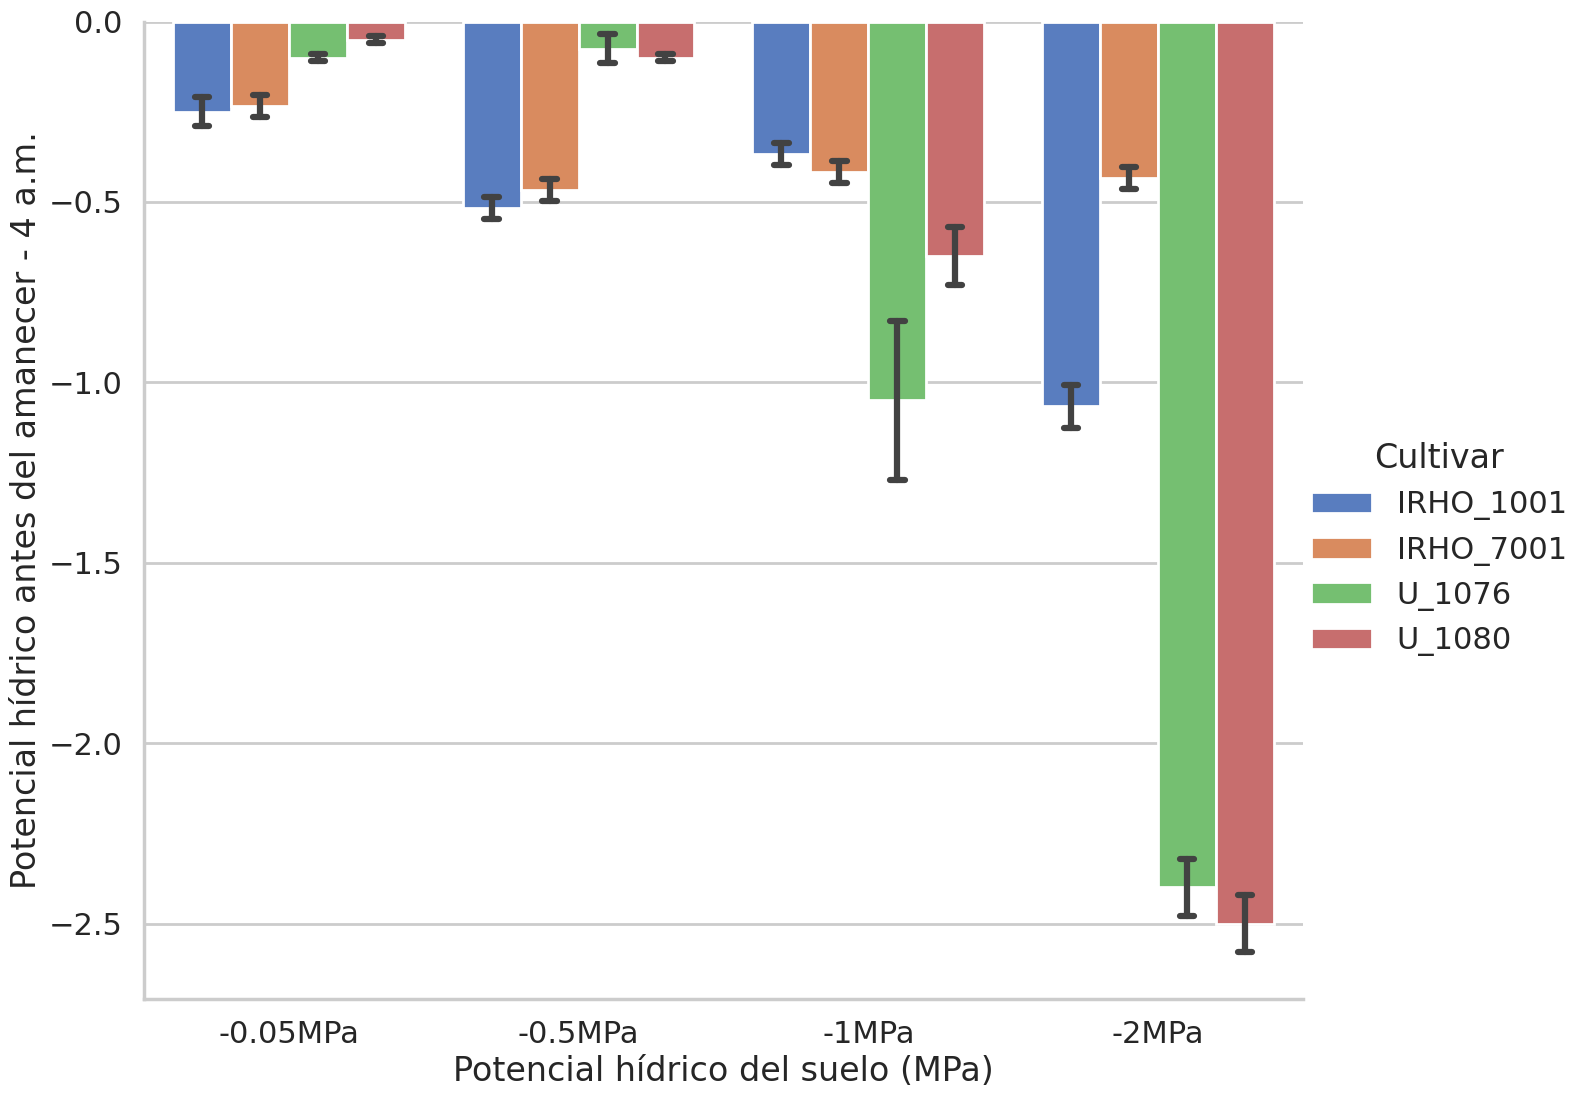

In [233]:
make_group_plot(raw_df, "PH4AM", "Potencial hídrico antes del amanecer - 4 a.m.")

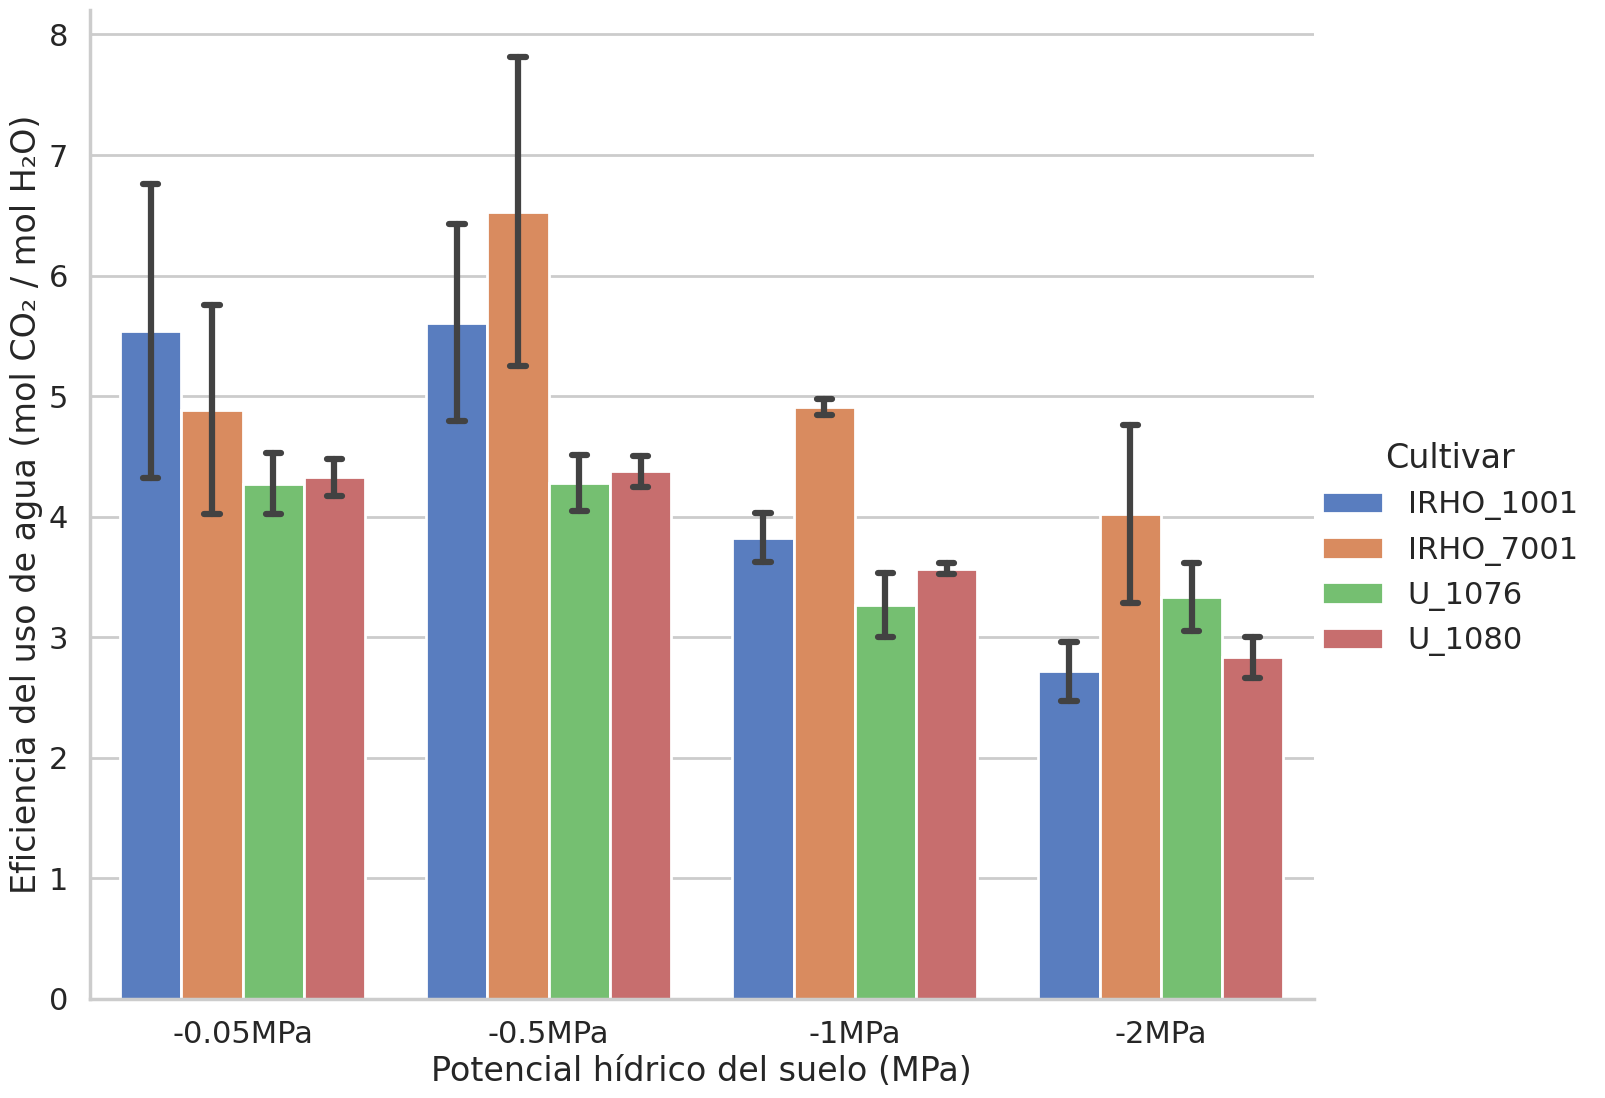

In [234]:
make_group_plot(raw_df, "WUE", "Eficiencia del uso de agua (mol CO₂ / mol H₂O)")

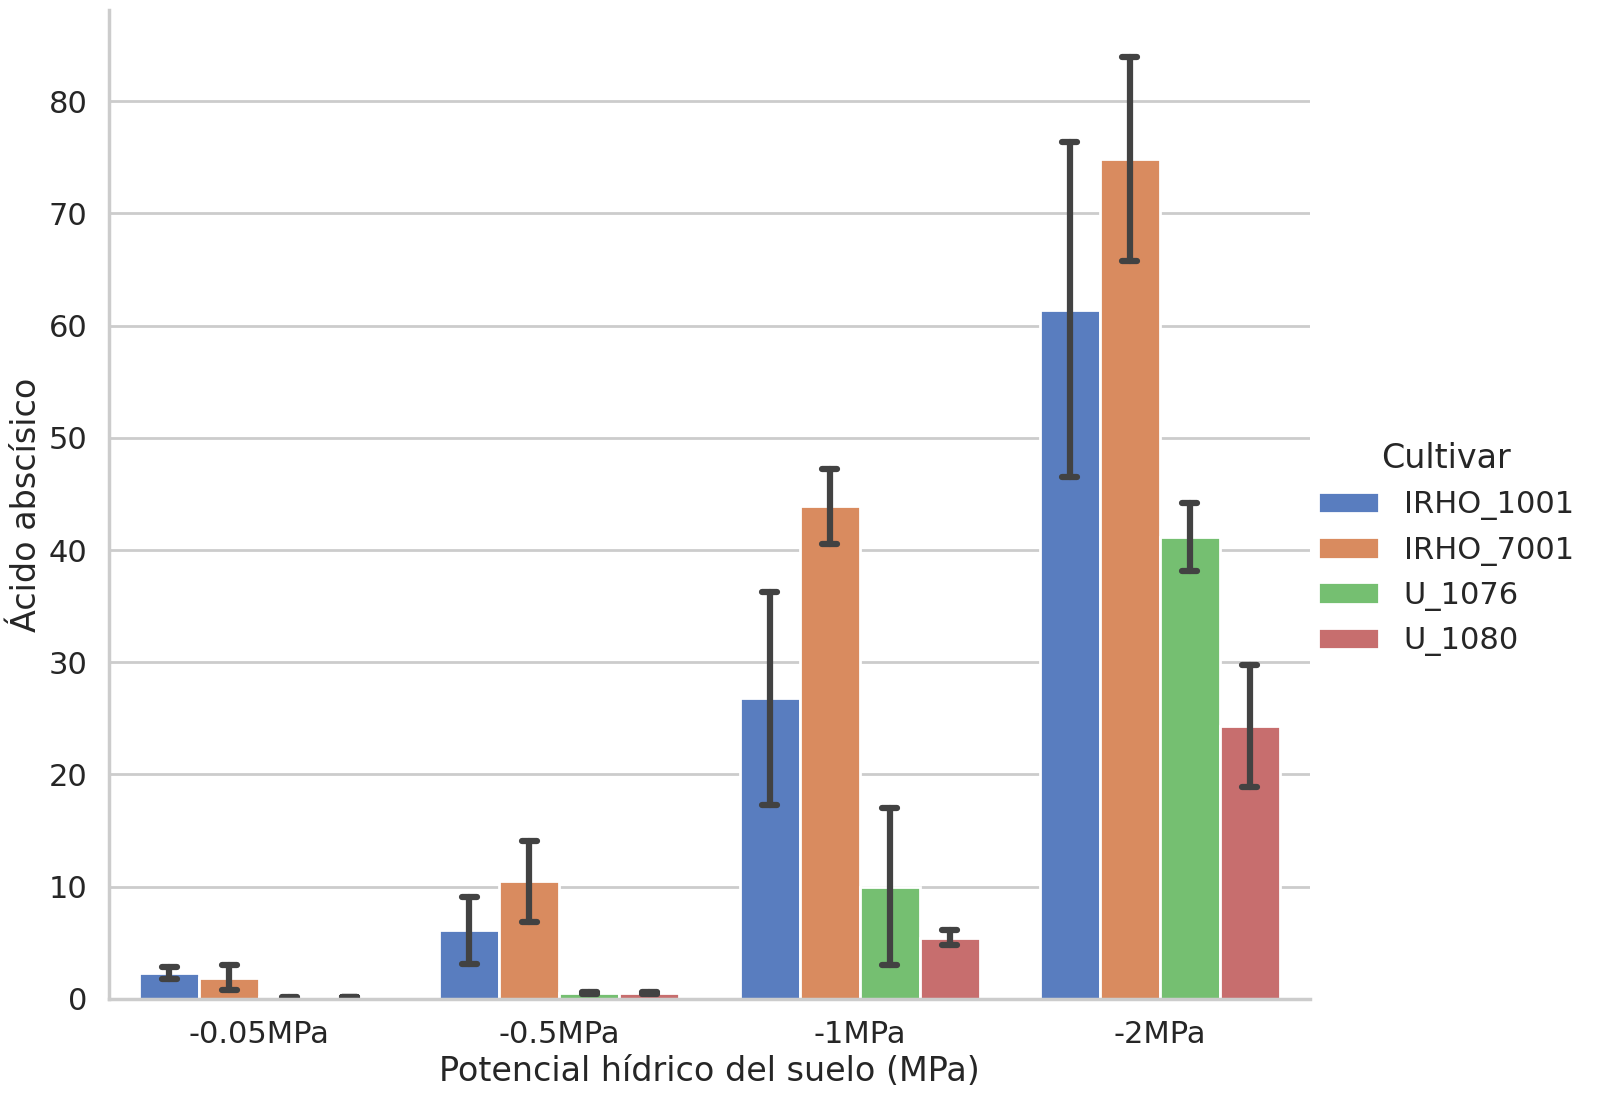

In [235]:
make_group_plot(raw_df, "ABA", "Ácido abscísico")

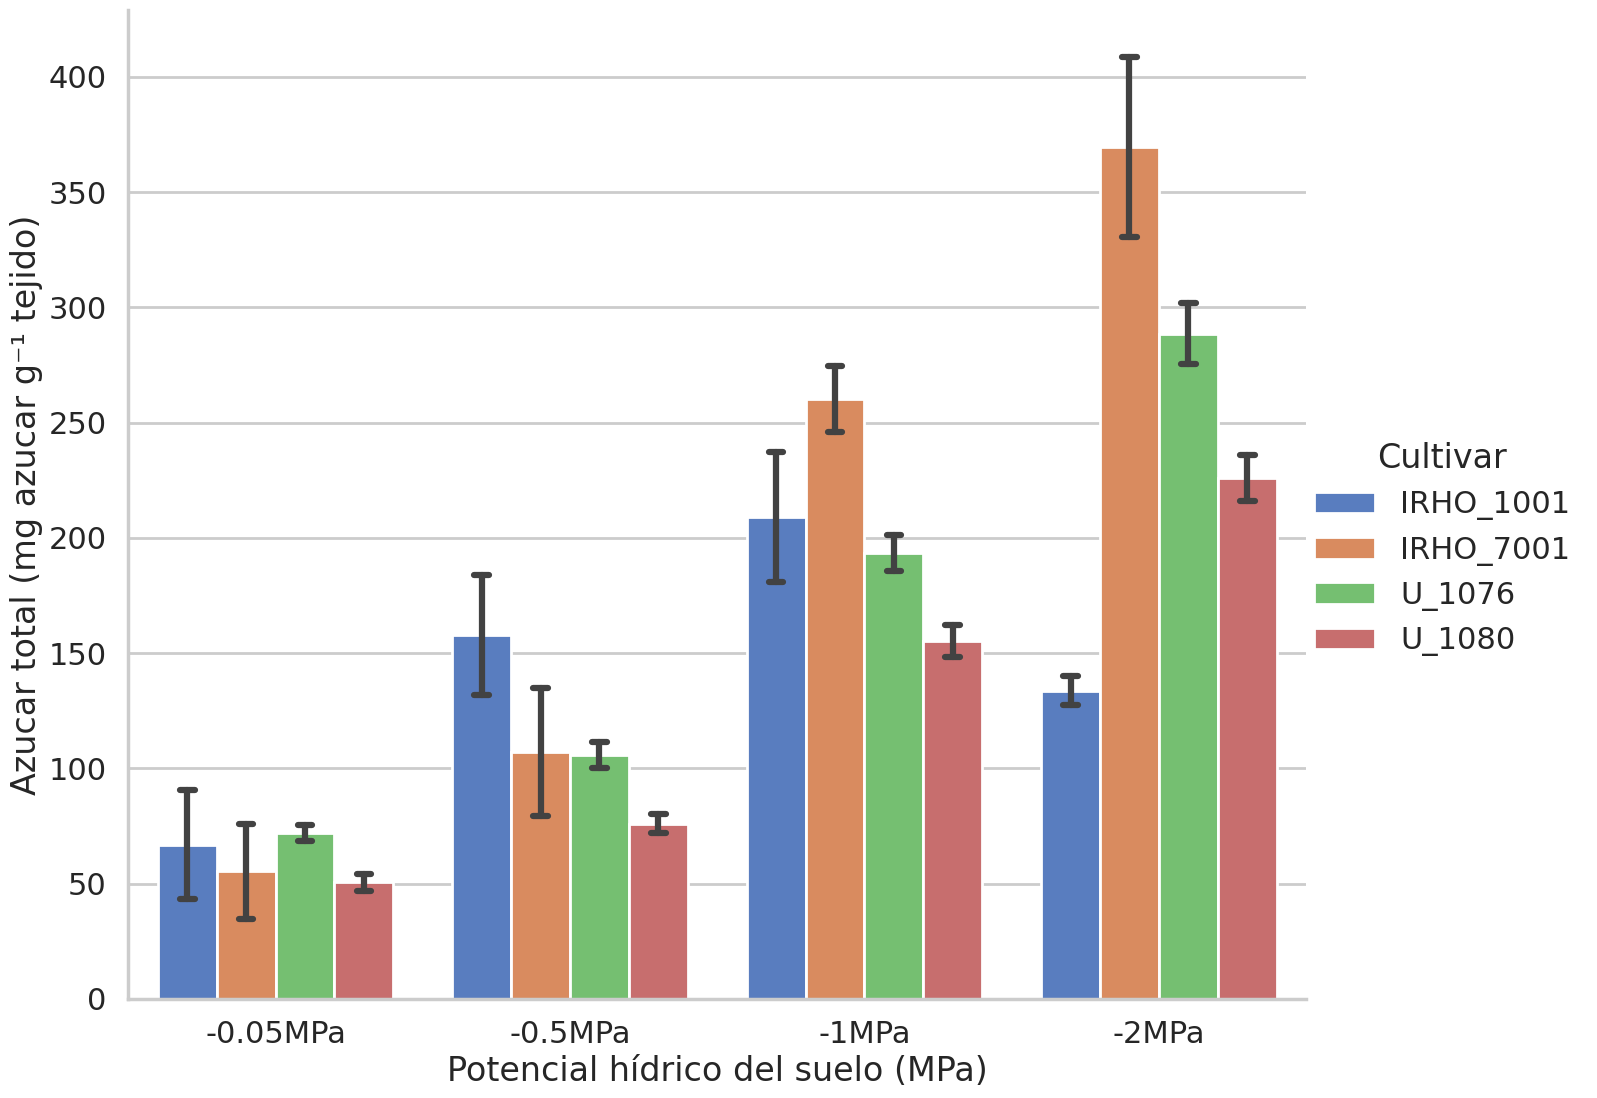

In [236]:
make_group_plot(raw_df, "TOTSUG", "Azucar total (mg azucar g⁻¹ tejido)")

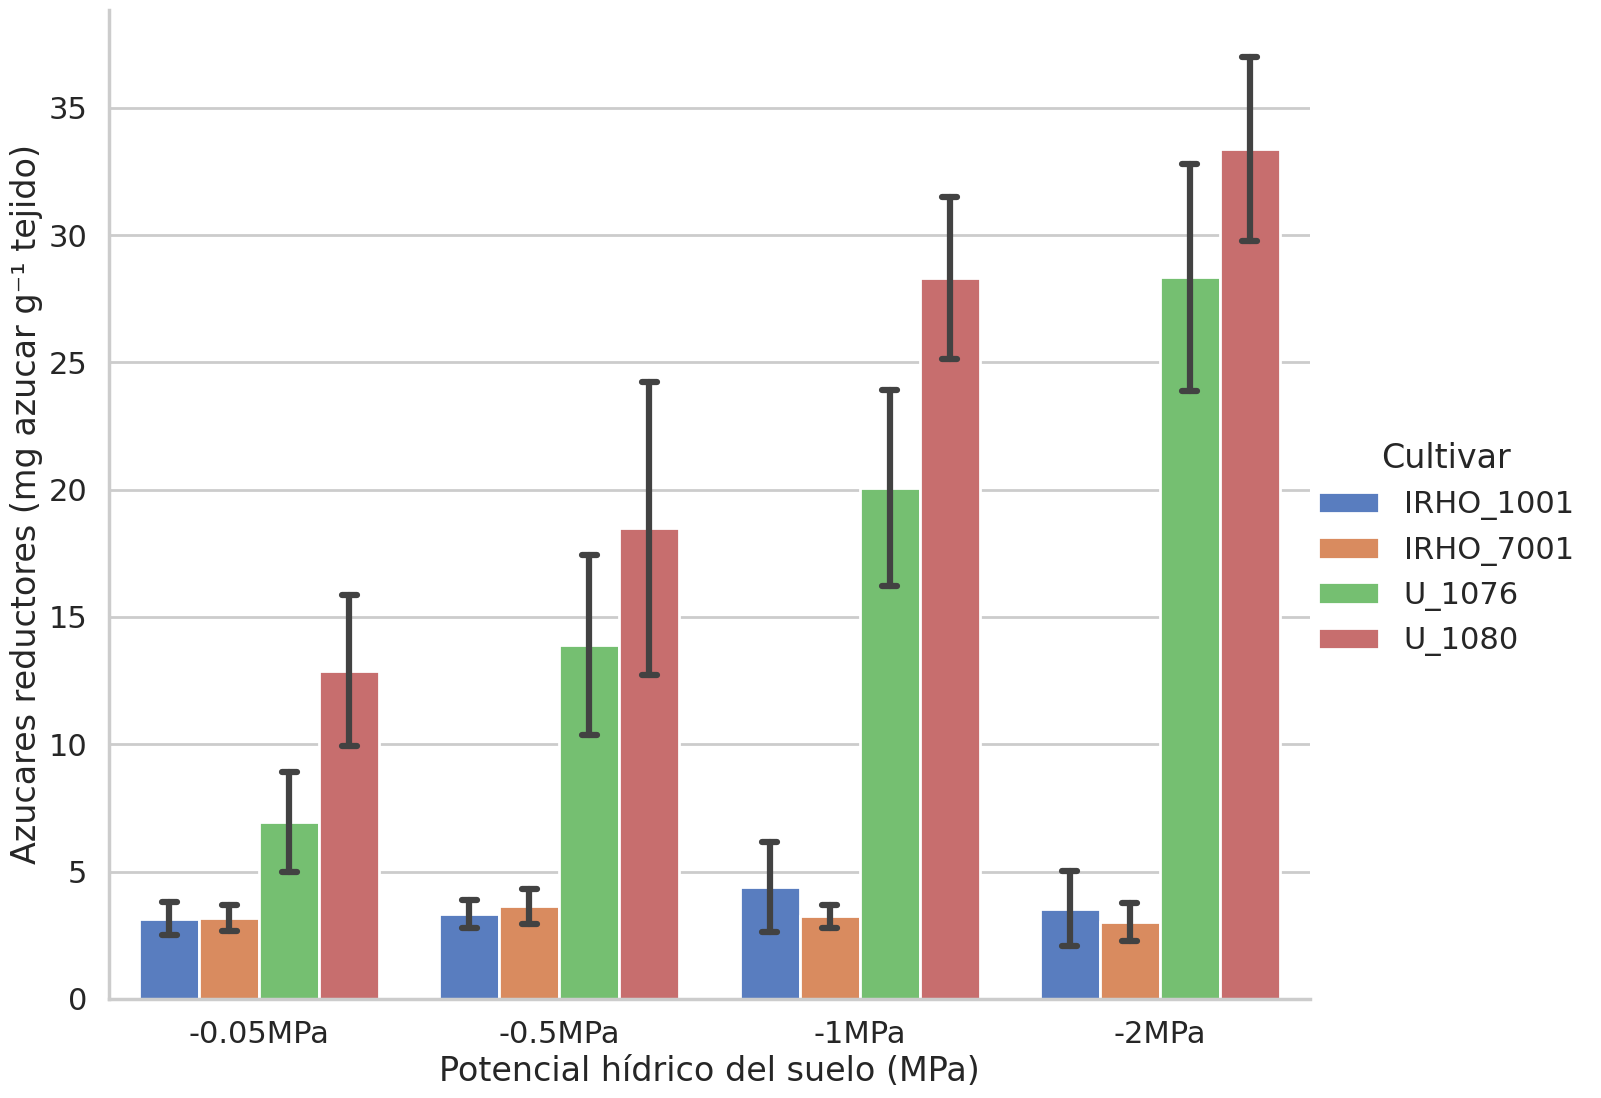

In [237]:
make_group_plot(raw_df, "REDSUG", "Azucares reductores (mg azucar g⁻¹ tejido)")

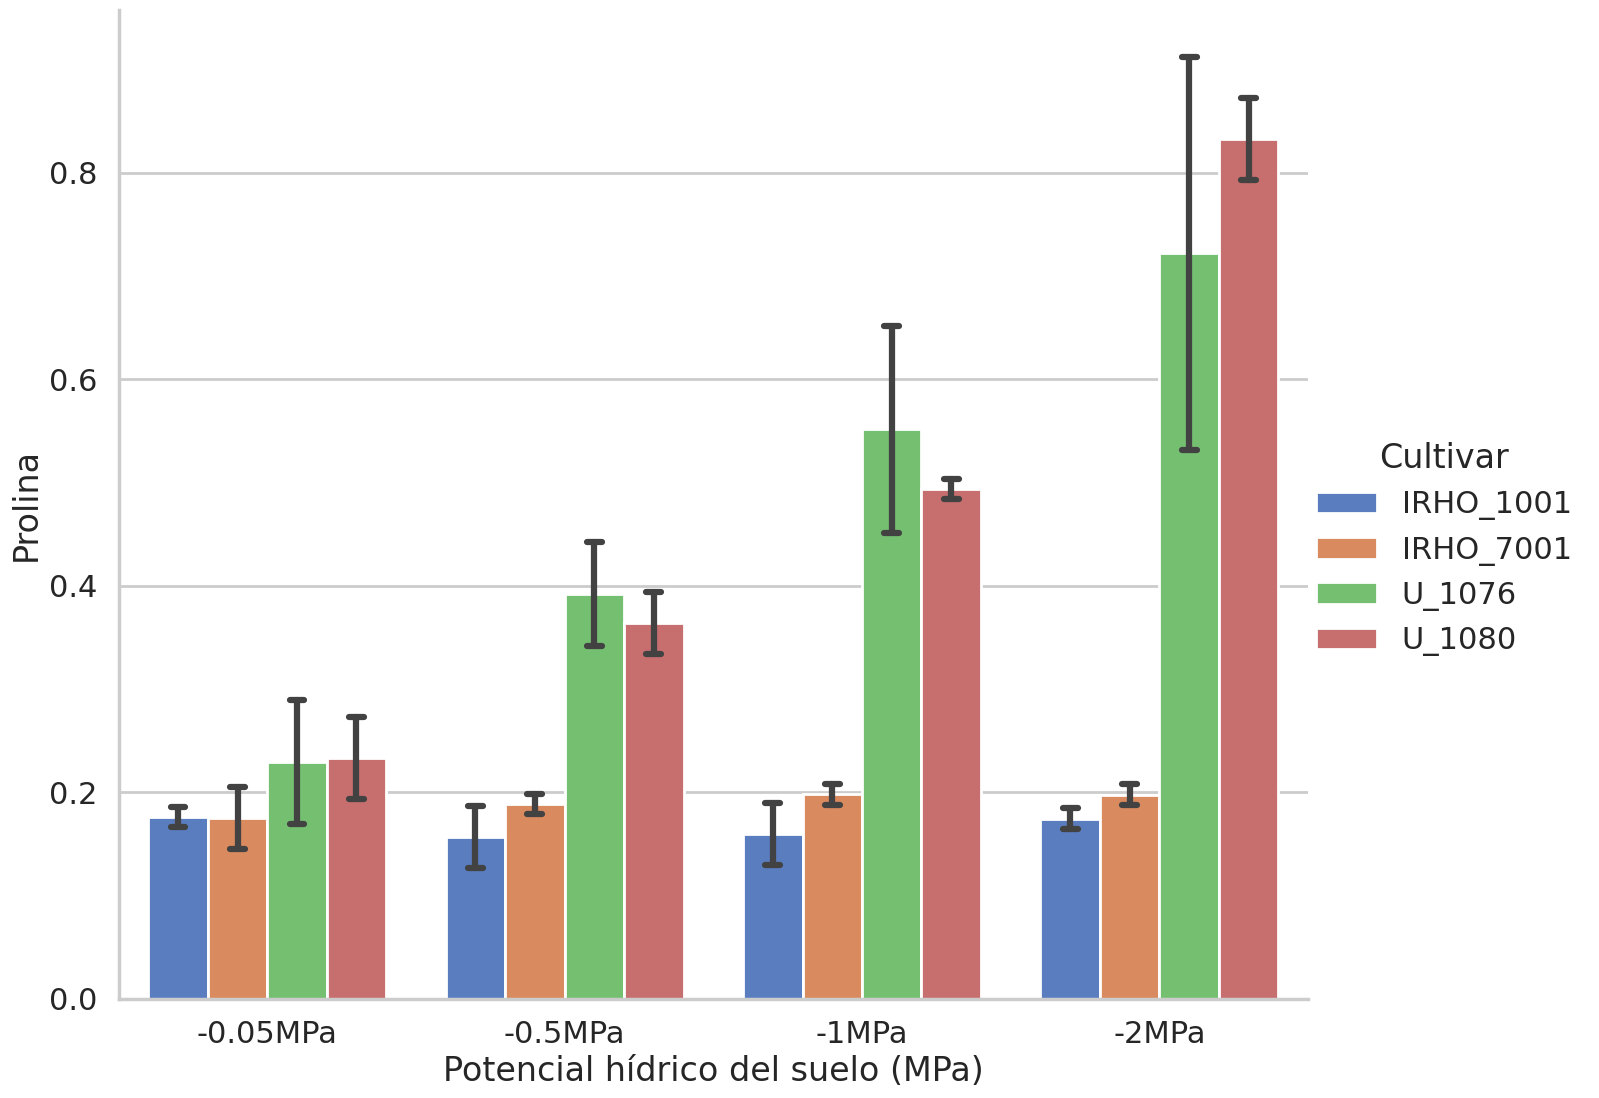

In [238]:
make_group_plot(raw_df, "PROLINE", "Prolina")